In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from neuron import h

_ = h.load_file("stdlib.hoc")
_ = h.load_file("import3d.hoc")

--No graphics will be displayed.


In [3]:
h.secondorder = 0

In [4]:
i_delay = 3.0  # ms
i_amp = 1.0  # nA
i_dur = 2.0  # ms

dt = 0.025  # ms
t_max = 10.0  # ms

time_vec = np.arange(0.0, t_max+2*dt, dt)
h.dt = dt

### Compartment

In [5]:
for sec in h.allsec():
    h.delete_section(sec=sec)

comp = h.Section()

In [6]:
comp.nseg = 1

comp.Ra = 1_000.0
comp.L = 10.0
comp.diam = 20.0

comp.insert("hh")
comp.gnabar_hh = 0.120  # S/cm2
comp.gkbar_hh = 0.036  # S/cm2
comp.gl_hh = 0.0003  # S/cm2
comp.ena = 50  # mV
comp.ek = -77.0  # mV
comp.el_hh = -54.3  # mV

In [7]:
stim = h.IClamp(comp(0.0))
stim.delay = i_delay
stim.dur = i_dur
stim.amp = i_amp

voltage1 = h.Vector()
voltage1.record(comp(0.0)._ref_v)

Vector[0]

In [8]:
v_init = -62.0
def initialize():
    h.finitialize(v_init)
    h.fcurrent()
    
def integrate():
    while h.t < t_max:
        h.fadvance()

In [9]:
initialize()

In [10]:
print(comp.m_hh)
print(comp.h_hh)
print(comp.n_hh)

0.07490098835688629
0.488947681848153
0.3644787002343737


In [11]:
integrate()

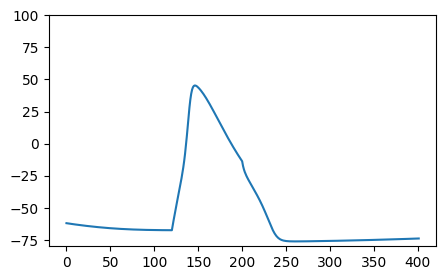

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
_ = ax.plot(list(voltage1))
_ = ax.set_ylim([-80, 100])

### Branch

In [13]:
nseg_per_branch = 8

In [14]:
for sec in h.allsec():
    h.delete_section(sec=sec)

branch = h.Section()

In [15]:
branch.nseg = nseg_per_branch

branch.Ra = 1_000.0

branch.L = 10.0 * nseg_per_branch
branch.diam = 2 * 3.0

branch.insert("hh")
branch.gnabar_hh = 0.120  # S/cm2
branch.gkbar_hh = 0.036  # S/cm2
branch.gl_hh = 0.0003  # S/cm2
branch.ena = 50  # mV
branch.ek = -77.0  # mV
branch.el_hh = -54.3  # mV

In [16]:
stim = h.IClamp(branch(0.0))
stim.delay = i_delay
stim.dur = i_dur
stim.amp = i_amp

voltage1 = h.Vector()
voltage1.record(branch(0.0)._ref_v)
voltage2 = h.Vector()
voltage2.record(branch(1.0)._ref_v)

Vector[2]

In [17]:
v_init = -62.0
def initialize():
    h.finitialize(v_init)
    h.fcurrent()
    
def integrate():
    while h.t < t_max:
        h.fadvance()

In [18]:
initialize()

In [19]:
integrate()

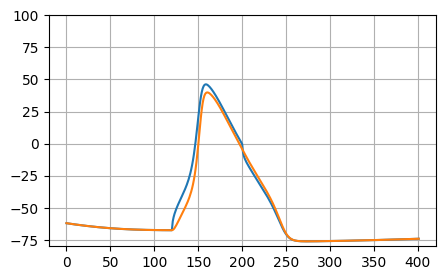

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
_ = ax.plot(list(voltage1))
_ = ax.plot(list(voltage2))
_ = ax.set_ylim([-80, 100])
ax.grid()

### Branch with unequal radiuses

In [146]:
nseg_per_branch = 8

In [147]:
for sec in h.allsec():
    h.delete_section(sec=sec)

branch = h.Section()

In [148]:
branch.nseg = nseg_per_branch

branch.Ra = 1_000.0

branch.L = 10.0 * nseg_per_branch

radiuses = np.linspace(3.0, 15.0, nseg_per_branch)
for i, comp in enumerate(branch):
    comp.diam = 2 * radiuses[i]

branch.insert("hh")
branch.gnabar_hh = 0.120  # S/cm2
branch.gkbar_hh = 0.036  # S/cm2
branch.gl_hh = 0.0003  # S/cm2
branch.ena = 50  # mV
branch.ek = -77.0  # mV
branch.el_hh = -54.3  # mV

In [149]:
stim = h.IClamp(branch(0.12))
stim.delay = i_delay
stim.dur = i_dur
stim.amp = i_amp

voltage1 = h.Vector()
voltage1.record(branch(0.0)._ref_v)
voltage2 = h.Vector()
voltage2.record(branch(1.0)._ref_v)

Vector[47]

In [150]:
v_init = -62.0
def initialize():
    h.finitialize(v_init)
    h.fcurrent()
    
def integrate():
    while h.t < t_max:
        h.fadvance()

In [151]:
initialize()
integrate()

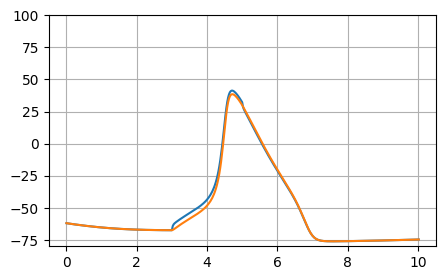

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
_ = ax.plot(time_vec, list(voltage1))
_ = ax.plot(time_vec, list(voltage2))
_ = ax.set_ylim([-80, 100])
ax.grid()

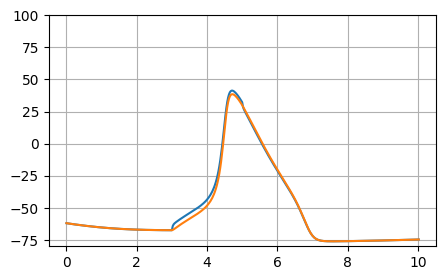

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
_ = ax.plot(time_vec, list(voltage1))
_ = ax.plot(time_vec, list(voltage2))
_ = ax.set_ylim([-80, 100])
ax.grid()

### Cell

In [52]:
nseg_per_branch = 8

In [53]:
for sec in h.allsec():
    h.delete_section(sec=sec)

branch1 = h.Section()
branch2 = h.Section()
branch3 = h.Section()

branch2.connect(branch1, 1, 0)
branch3.connect(branch1, 1, 0)

__nrnsec_0x3ac1d70

In [54]:
for sec in h.allsec():
    sec.nseg = nseg_per_branch
    
    sec.Ra = 1_000.0
    sec.L = 10.0 * nseg_per_branch
    sec.diam = 2 * 5.0
    
    sec.insert("hh")
    sec.gnabar_hh = 0.120  # S/cm2
    sec.gkbar_hh = 0.036  # S/cm2
    sec.gl_hh = 0.0003  # S/cm2
    sec.ena = 50  # mV
    sec.ek = -77.0  # mV
    sec.el_hh = -54.3  # mV

In [55]:
stim = h.IClamp(branch1(0.0))
stim.delay = i_delay
stim.dur = i_dur
stim.amp = i_amp

voltage1 = h.Vector()
voltage1.record(branch1(0.0)._ref_v)
voltage2 = h.Vector()
voltage2.record(branch2(1.0)._ref_v)
voltage3 = h.Vector()
voltage3.record(branch3(1.0)._ref_v)

Vector[16]

In [56]:
v_init = -62.0
def initialize():
    h.finitialize(v_init)
    h.fcurrent()
    
def integrate():
    while h.t < t_max:
        h.fadvance()

In [57]:
initialize()
integrate()

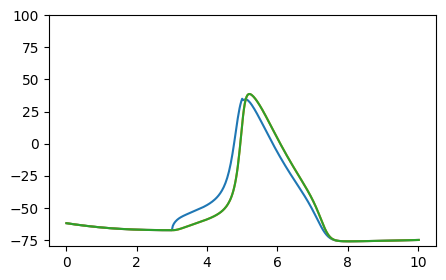

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
_ = ax.plot(time_vec, list(voltage1))
_ = ax.plot(time_vec, list(voltage2))
_ = ax.plot(time_vec, list(voltage3))
_ = ax.set_ylim([-80, 100])